# Pandas DataFrame for storing tweet feed

Creating following date frame for storing tweets

- **climate_feed_df** DataFrame for storing tweet
- **retweeted_status_df** for storing original tweet

In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
import requests
from bs4 import BeautifulSoup as bsp


In [ ]:
!wget https://github.com/psnegi/data_science_tools1/raw/master/hws/retweeted_status_df.pkl

In [ ]:
!wget https://github.com/psnegi/data_science_tools1/raw/master/hws/climate_feed.pkl

<font color= "red">Click on these links if the above downloads fail. </font>


https://github.com/psnegi/data_science_tools1/raw/master/hws/climate_feed.pkl

https://github.com/psnegi/data_science_tools1/raw/master/hws/retweeted_status_df.pkl

Keep these pkl file in the same directory as notebook

In [ ]:
retweeted_status_df = pd.read_pickle("./retweeted_status_df.pkl")

In [ ]:
retweeted_status_df

In [ ]:
#climate_feed_df.to_pickle("./climate_feed.pkl")
climate_feed_df = pd.read_pickle("./climate_feed.pkl")
climate_feed_df

Here are dtypes for climate_feed_df. We'll work with only
- entities to extract hashtags
- retweeted_status in case we need to extract original full tweet
- truncated
- text: tweet text
- created_at
- user_id

Some of them have wrong datatypes.

In [ ]:
climate_feed_df.dtypes

# Q1 (points .5) replace None with nan in climate_feed_df. Also display some random rows.


In [ ]:
# write code here


Working with only selected attributes.

In [ ]:
climate_feed_df = climate_feed_df[['created_at', 'entities','retweeted_status', 'truncated', 'user_id', 'text' ]].copy()

In [ ]:
climate_feed_df.sample(10)

# Q2 (points .5 =.25+.25) convert
- created_at to date time type
- truncated to bool type.


In [ ]:
# write code here

Checking datatype again

In [ ]:
climate_feed_df.dtypes

# Q3(points .5) In climate_feed_df, calculate the number of NAN values in various columns

In [ ]:
# write code here


We'll use **ast** module to parse string to python dictionary

# Q4(points 1=.5+.5) Using *ast* module  convert entities to python dictionary. This dictionary should contain hashtags and user_mentions
 - Create a columns named hashtags. Values in this columns should be command separated values of **text** attribute in **hashtags**  value.
 - Create a columns named user_mentions.Values in this columns should be command separated values of **name** attribute in **user_mentions** values.

In [21]:
# write code here



# Cleaning tweets

Let's see some random tweets

In [27]:
tweet_length= 280
pd.set_option('max_colwidth', 2*tweet_length)
climate_feed_df['text'].sample(100)

8508         RT @DIAL1611: Nikki Haley on Pelosi’s Call to ‘Protect God’s Creation’ from Climate Change: What About Unborn Babies?\nhttps://t.co/mQxA607q…
4648          RT @brianschatz: I’m not a socialist. But I believe that every American deserves health care. I also believe that college should be debt fr…
2730          RT @marklevinshow: The insane Democrat Left.  “Climate change” was always the political pathway drug to fundamentally destroying our free s…
8700           RT @RobOakeshott1: The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember, the…
7570          RT @CaputoRodolfo: These Chinese people going to such great lengths to make this climate change nonsense they invented look real (?) https:…
5260          RT @SenBlumenthal: Climate change is an existential crisis. I’m proud to co-sponsor the #GreenNewDeal—affirming our commitment to develop a…
2413                                                                  

**Example of tweet not truncated**

In [28]:
climate_feed_df['text'].loc[3929]

'Fighting climate change without nuclear is a fool’s errand. https://t.co/KPSCk6fjsa'

**Exampe of tweet truncated**

In [29]:
climate_feed_df['text'].loc[3928]

'RT @_Oliver_Yates: If only Abbott could fight as hard for the safety of our country from the impacts of climate change, as he is fighting f…'

Truncated tweet has three horizontal ellipses in it. One can check retweeted_status values and 
use it got the the original tweet text

In [30]:
climate_feed_df.retweeted_status.loc[3928]

1.0943594112863928e+18

In [31]:
retweeted_status_df[retweeted_status_df.id == climate_feed_df.retweeted_status.loc[3928]].text.iloc[0]

'If only Abbott could fight as hard for the safety of our country from the impacts of climate change, as he is fight… https://t.co/OJlsDeFoNA'

There is url above tweet. We can use **requests** to get the complete text.



# Q5(points 3.5= 1(use of requests and text extraction from right html element)+.5+1+1 ) Perform following activities for creating a new original_tweet_text field in climate_feed_df. 

- If  climate_feed_df has a valid retweeted_status(**it is an id of the record in retweeted_status_df** ), then use retweeted_status_df to get the original text(**retweeted_status_df.text**) otherwise use None(**Ignore the value of climate_feed_df.truncated field for this activity.**).
    + If retweeted_status_df.text has a URL(like https://t.co/RKyppIS5c9 ), use it to get complete text from right html element. 
    <font color='red'> If you have a way to figure out that one is not supposed to web scrap this URL don't scrap it.</font>
- Create a new field named **original_tweet_text** in climate_feed_df to store the text extracted from URL(use None if requests to URL fails or any other issues.). Use retweeted_status_df.text if there was no 
 URL.
- From  newly original_tweet_text field remove
    - one or more \n with .(dot)
    - any url(http, https)
    - @user, @user:

<font color="red">Note that as you will be making a lot of requests call(I/O bound calls), this portion of code can be slow. you may want to test your code on a small number of records first. </font>

In [33]:
# Write code here



# Q 6(point 1= .5+.5) Remove all the reference  if RT and  @user: or @user, and url in climate_feed_df text attribute.

In [37]:
# write code here


# Q 7 (2 point) Create a new attribute in climate_feed_df named *final_tweet_text*. If *original_tweet_text* is None  then use climate_feed_df.text otherwise use *original_text_tweet* if initial words matched with *climate_feed_df.text* words. If words doesn't match use climate_feed_df.text

Note that some time after fetching text from a url based on retweeted_status_df.text, we may get different text. We can fix it but for this homework we are ignoring it.

In [39]:
# wite code here


# Emoji detection

See this example of emoji as unicode characters

In [41]:
climate_feed_df['final_tweet_text'].loc[3931]

'  Oh my god, CARBON.......😱😱😱 Cue the outrage machine against smartphone. These things are adding to climate change.'

We can use use regex to capture this emji

https://apps.timwhitlock.info/emoji/tables/unicode


In [42]:
emoji_regex = re.compile(r"\U0001F631", re.UNICODE)

In [43]:
emoji_regex.findall(climate_feed_df['final_tweet_text'].loc[3931])

['😱', '😱', '😱']

We'll use emoji library to make this task easier.

Here is some documentation about unicode support in python

https://docs.python.org/3/howto/unicode.html

In [ ]:
! pip install emoji

In [45]:
import emoji

In [46]:
emoji.UNICODE_EMOJI

{'\U0001f945': ':goal_net:',
 '🏃🏽': ':person_running_medium_skin_tone:',
 '🚶🏽\u200d♂️': ':man_walking_medium_skin_tone:',
 '♿': ':wheelchair_symbol:',
 '👨🏼\u200d⚖️': ':man_judge_medium-light_skin_tone:',
 '🇩🇯': ':Djibouti:',
 '👩🏻\u200d🚀': ':woman_astronaut_light_skin_tone:',
 '🐕': ':dog:',
 '🙇🏼': ':person_bowing_medium-light_skin_tone:',
 '🙋🏼\u200d♂️': ':man_raising_hand_medium-light_skin_tone:',
 '👩🏾\u200d💼': ':woman_office_worker_medium-dark_skin_tone:',
 '⛹🏿\u200d♂️': ':man_bouncing_ball_dark_skin_tone:',
 '➖': ':heavy_minus_sign:',
 '👩🏽': ':woman_medium_skin_tone:',
 '✉': ':envelope:',
 '🌍': ':globe_showing_Europe-Africa:',
 '⭐': ':white_medium_star:',
 '👋🏾': ':waving_hand_medium-dark_skin_tone:',
 '\U0001f93d🏼\u200d♂️': ':man_playing_water_polo_medium-light_skin_tone:',
 '👁️\u200d🗨️': ':eye_in_speech_bubble:',
 '🏋🏽\u200d♂️': ':man_lifting_weights_medium_skin_tone:',
 '🇯🇴': ':Jordan:',
 '🚵🏾': ':person_mountain_biking_medium-dark_skin_tone:',
 '🇧🇬': ':Bulgaria:',
 '♻': ':recycling_s

# Q 8(1 point) Create a column  called *emoji*.  This coumns should contains a list of tuples for emoji detected in *final_tweet_text*. First element of tuple is the emoji detected and second is the text describing the emoji.

In [47]:
# write code here


# We'll use wordcloud  to do elemetary exploratory data analysis(EDA). We'll do some cleanup before using wordcloud.

https://github.com/amueller/word_cloud

In [ ]:
!pip install wordcloud

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [52]:
%matplotlib inline

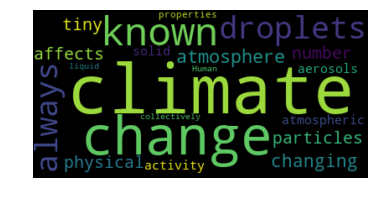

In [53]:
# here is a sample
text = "climate change. Climate is always changing. Human activity also affects climate through changes in the number and physical properties of tiny solid particles and liquid droplets in the atmosphere, known collectively as atmospheric aerosols"
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


plt.show()

As you can see word size is proportional to frequency of a word and highlight the main keywords in a text.
This gives an idea about the content of the  text.

We can do all the text pre processing or wrangling
 like 

- More Cleaning
- Case conversion
- Spell correction
- Expanding contractions
- Removing stop words
- Morphological normalization
    - Stemming
    - Lemmatization


But for this homework we'll only **do expanding contractions,  stop words removal,  and lemmatization**

# Q 9 (2 = .5+.5+.5+.5 points) Do
- expanding contractions
- stop words removal
- lemmatization
- Use wordcloud to visualize keywords

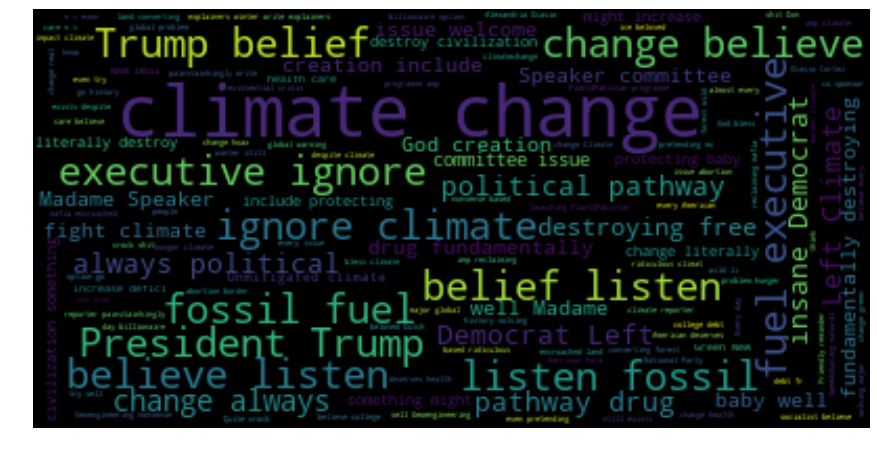

In [69]:
# write code here
# I have include a sample ooutput. Your output can be different

# Homework ends
# Final thoughts
He haven't done all the cleanup or used all the attributes for EDA.I just want to highlight one more clean up activity related to language.

In [72]:
import enchant

In [73]:
dictionary = enchant.Dict('en')

In [70]:
climate_feed_df['text'].loc[5217]

'去LACMA那么多次，都没意识到旁边的Tar Pits是啥…\n一直以为是摆几个造型给小朋友们玩的公园…\n站在千年前的point看千年后的楼宇车辆，再一想climate change，千年后人类可能也不存在了就觉得——有点兴奋'

In [74]:
[dictionary.check(w) for w in  nltk.word_tokenize(climate_feed_df['text'].loc[5217])]

[False, False, False, False, False]